In [1]:
##### Importing Relevant Libraries ######
#########################################

import pandas as pd
import numpy as np
import os
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix,f1_score ## model evaluation metrics
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit ### datasplitting
 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV          ### hyperparameter finding

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier       ### models from sklearn

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score, recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
####### Loading Data ######
###########################


health_data = pd.read_csv('Dataset/health_train.csv')  ## Loads the data

In [3]:
#making a copy data for working on algorithms

data = health_data

In [4]:
data.shape ## gets the shape of the data

(50882, 14)

In [5]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [6]:
data.info() ### prints out informatio regarding columns in the data

#### Insight #####
####################

# Out of 13 columns, we have around 8 columns of numeric type, 5 columns of string type
# There doesn't seem to have missing values in the columns, however we would investigate this once again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

### Data Cleaning

In [7]:
data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [8]:
# verify percitage of null values

null_data = data.isnull().sum() / len(data) * 100
null_data = null_data[null_data > 0]
null_data.sort_values(inplace=True)
null_data

Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
dtype: float64

In [9]:
# Summary of the dataset

data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


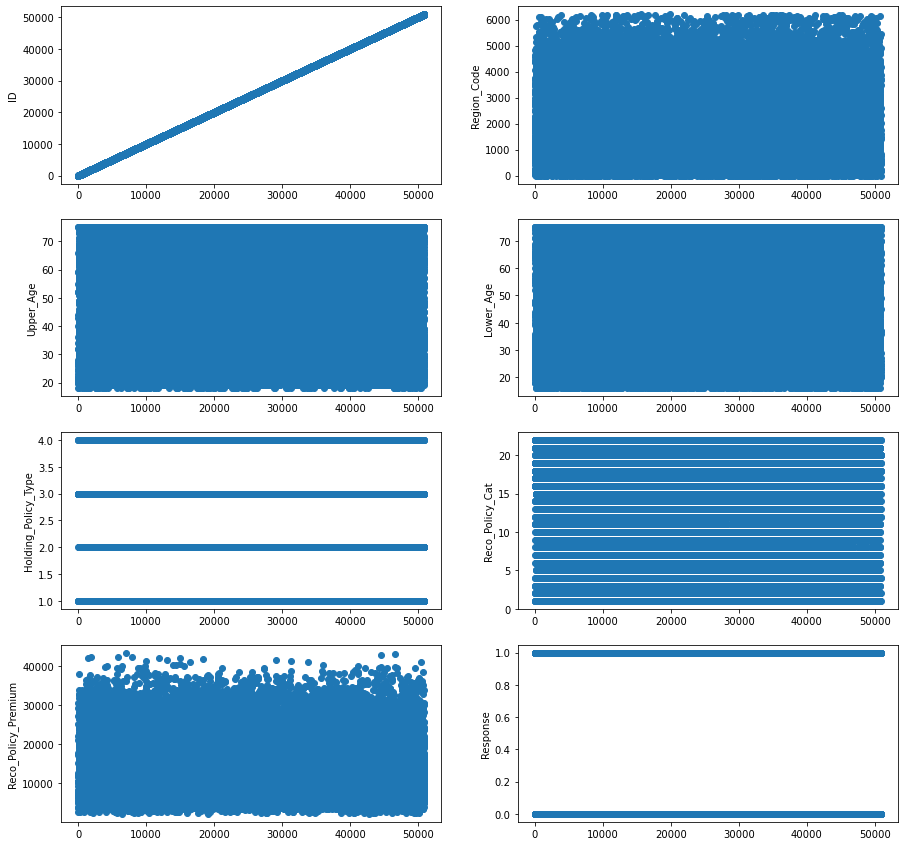

In [10]:
#### Visualizing numeric columns ######

numeric_cols = data.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 4
plot_cols = 2

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (15,15))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1
        
###### Insights #####
#####################

## ID column just contains the index so can be removed.
## Capping could be done to limit the impact of outliers.
## Normalization could be done since the scale is different for most of the variables.

In [11]:
#### Describing categorical columns #####

cat_data = data.select_dtypes(include = np.object)

column_names = list(cat_data.columns)

for column in column_names:
    print('Column ', column)
    print('Number of unique elements ', cat_data[column].nunique())
    print('***************\n')


Column  City_Code
Number of unique elements  36
***************

Column  Accomodation_Type
Number of unique elements  2
***************

Column  Reco_Insurance_Type
Number of unique elements  2
***************

Column  Is_Spouse
Number of unique elements  2
***************

Column  Health Indicator
Number of unique elements  9
***************

Column  Holding_Policy_Duration
Number of unique elements  15
***************



### Data Preprocessing

In [12]:
print('The shape of the data before preprocessing ', data.shape)

The shape of the data before preprocessing  (50882, 14)


In [13]:
#### Preprocess - 1: Remove the ID column ####

data.drop(['ID'],axis=1,inplace=True)  ## removes specified columns

In [14]:
print('The shape of the data after first preprocessing block ', data.shape)

data.reset_index(drop=True,inplace=True) ### resetting index

The shape of the data after first preprocessing block  (50882, 13)


### Encoding the categorical columns

In [15]:
data.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [18]:
data['City_Code'] = labelencoder.fit_transform(data['City_Code'])
data['Accomodation_Type'] = labelencoder.fit_transform(data['Accomodation_Type'])
data['Reco_Insurance_Type'] = labelencoder.fit_transform(data['Reco_Insurance_Type'])
data['Is_Spouse'] = labelencoder.fit_transform(data['Is_Spouse'])

In [19]:
data['Health Indicator'].replace(to_replace='X1', value='0', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X2', value='1', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X3', value='2', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X4', value='3', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X5', value='4', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X6', value='5', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X7', value='6', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X8', value='7', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X9', value='8', regex=True, inplace=True)

In [20]:
data['Holding_Policy_Duration'].replace(to_replace='\+', value='', regex=True, inplace=True)
data['Holding_Policy_Duration'] = pd.to_numeric(data['Holding_Policy_Duration'], errors='coerce')


In [21]:
## Let's see how the data looks after the encoding

data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,22,3213,1,0,36,36,0,0,14.0,3.0,22,11628.0,0
1,31,1117,0,1,75,22,0,1,NaN,NaN,22,30510.0,0
2,31,3732,0,0,32,32,0,NaN,1.0,1.0,19,7450.0,1
3,16,4378,0,1,52,48,0,0,14.0,3.0,19,17780.0,0
4,34,2190,1,0,44,44,0,1,3.0,1.0,16,10404.0,0


In [22]:
data.dtypes

City_Code                    int32
Region_Code                  int64
Accomodation_Type            int32
Reco_Insurance_Type          int32
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                    int32
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [23]:
data.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

#### Cleaning the Null Values

In [24]:
cols = ['Holding_Policy_Duration','Holding_Policy_Type','Health Indicator']
for col in cols:
    print('Imputation with Median: %s' % (col))
    data[col].fillna(data[col].median(), inplace=True)

Imputation with Median: Holding_Policy_Duration
Imputation with Median: Holding_Policy_Type
Imputation with Median: Health Indicator


In [25]:
data.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [26]:
print('The shape of data after all preprocessing ',data.shape)

The shape of data after all preprocessing  (50882, 13)


### Splitting the Dataset

In [27]:
X = data.drop('Response', axis = 1)
Y = data.Response

In [28]:
from imblearn.over_sampling import RandomOverSampler

randomsample=  RandomOverSampler()
X_new,Y_new=randomsample.fit_resample(X,Y)

In [29]:
sc_data= StandardScaler().fit_transform(X_new.values)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(np.array(sc_data), np.array(Y_new), test_size=0.30)
eval_set=[(X_test, Y_test)]

In [31]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((54142, 12), (23204, 12), (54142,), (23204,))

### Random Forest

In [32]:
rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_model = rf_clf.fit(X_train, Y_train)

In [33]:
print('Train accuracy :',rf_model.score(X_train, Y_train))
print('Test accuracy  :',rf_model.score(X_test, Y_test))

Train accuracy : 0.9958627313361161
Test accuracy  : 0.8737717634890536


In [34]:
ran_forest_pred = rf_model.predict(X_test)
print(ran_forest_pred)

[0 0 0 ... 1 1 1]


In [35]:
ran_forest_cm = confusion_matrix(Y_test, ran_forest_pred)
print(ran_forest_cm)

[[ 9942  1746]
 [ 1183 10333]]


In [36]:
random_forest_classification_report = classification_report(Y_test, ran_forest_pred)
print(random_forest_classification_report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     11688
           1       0.86      0.90      0.88     11516

    accuracy                           0.87     23204
   macro avg       0.87      0.87      0.87     23204
weighted avg       0.87      0.87      0.87     23204



In [37]:
print("accuracy_score is  :", accuracy_score(Y_test, ran_forest_pred))
print("precision score is :",precision_score(Y_test, ran_forest_pred))
print("recall is          :",recall_score(Y_test, ran_forest_pred))
print("F1_score is        :",f1_score(Y_test, ran_forest_pred))

accuracy_score is  : 0.8737717634890536
precision score is : 0.8554516102326352
recall is          : 0.8972733588051407
F1_score is        : 0.8758635304089849


ROC_AUC Score : 0.8739446876161228


<function matplotlib.pyplot.show(close=None, block=None)>

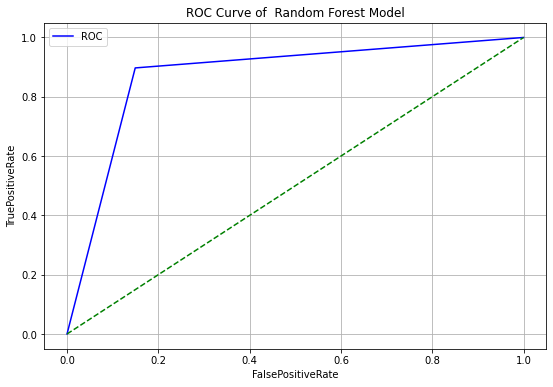

In [38]:
print("ROC_AUC Score :",roc_auc_score(Y_test, ran_forest_pred))

fpr,tpr,thresholds=roc_curve(Y_test, ran_forest_pred)
plt.figure(figsize=(9,6))
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title('ROC Curve of  Random Forest Model')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid()
plt.legend()
plt.show